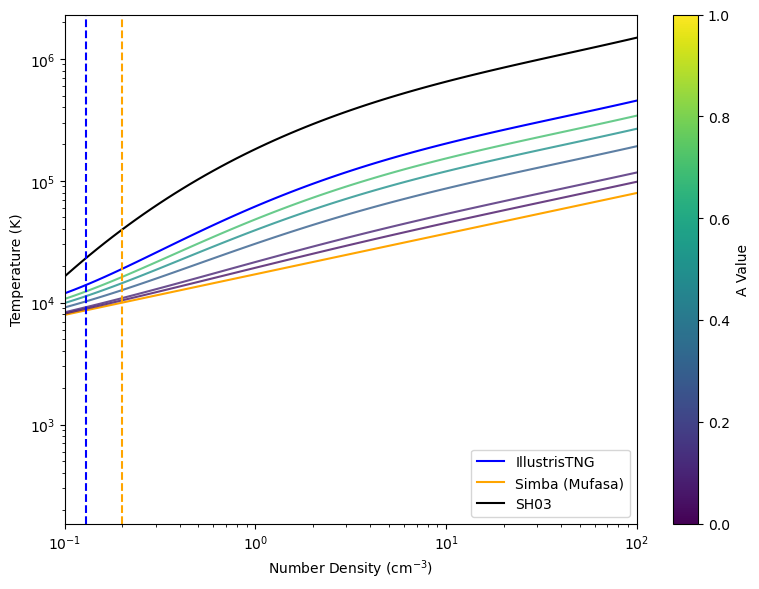

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mu = 0.5
m_g = 1e10
T_0 = 1e4 * u.K
N_ngb = 64
k_B = c.k_B
G = c.G    
m_p = c.m_p

n_H = np.logspace(-2, 2, 100) / u.cm**3  

# IllustrisTNG (Springel & Hernquist 2003)
log_p_SH03 = 0.050 * np.log10(n_H.value)**3 - 0.246 * np.log10(n_H.value)**2 + 1.749 * np.log10(n_H.value) - 10.6
p_SH03 = (10**log_p_SH03 * u.erg / u.cm**3)

# Simba (Mufasa)
n_th = 0.2 * u.cm**-3
Tng_threshold = 0.13 * u.cm**-3

mask = n_H > n_th
mask2 = n_H > Tng_threshold

T_mufasa = np.full_like(n_H.value, np.nan) * u.K
P_mufasa = np.full_like(n_H.value, np.nan) * (u.erg / u.cm**3)

T_mufasa = T_0 * (n_H / n_th)**(1/3)
P_mufasa = n_H * k_B * T_mufasa

ATng = 0.3
T_SH03 = (p_SH03 / (n_H * k_B)).to(u.K)
T_TNG = ((ATng) * T_SH03 + (1-ATng) * 1e4 * u.K)

fig, ax = plt.subplots(figsize=(8,6))
ax.loglog(n_H.value, T_TNG, label='IllustrisTNG', color='blue')
ax.loglog(n_H.value, T_mufasa, label='Simba (Mufasa)', color='orange')
ax.loglog(n_H.value, T_SH03, label='SH03', color='black')

A_values = [0.05, 0.1, 0.3, 0.5, 0.7]
cmap = cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=1)

for A in A_values:
    color = cmap(norm(A))
    T_A = A * T_TNG + (1-A) * T_mufasa
    ax.loglog(n_H.value, T_A, color=color, alpha=0.8)

ax.axvline(0.13, color='blue', linestyle='--')
ax.axvline(0.2, color='orange', linestyle='--')
ax.set_xlim(1e-1, 1e2)
ax.set_xlabel('Number Density (cm$^{-3}$)')
ax.set_ylabel('Temperature (K)')

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax, label='A Value')

ax.legend()
fig.tight_layout()
plt.show()